<a href="https://colab.research.google.com/github/hathimazman/Msc-Data-Science-Project2/blob/main/P153146_Project_2_20242025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <h1>
    Ahmad Hathim bin Ahmad Azman (P153146)
  </h1>
  <h2>
    Project 2<br>
    STQD6014 - Data Science<br>
    Semester 1 2024/2025
  </h2>
</div>

<a name="intro"></a>
# Introduction

> This is a copy dataset from [kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?select=Expanded_data_with_more_features.csv). The downloaded version can be taken from my [gdrive](https://drive.google.com/file/d/1qkrpsk77nkaKU_vHSH4ZSvl-_5h2KZ47/view?usp=sharing) for reproducibility.

The purpose of this project is to analyze a dataset containing students performance in exams. This dataset also provides information regarding student's demographic data, and some behvioural data. Multiple Python libraries will be used for cleaning, and visualization such as pandas, matplotlib, and seaborn.

---

Contents:
*   [Introduction](#intro)
*   [Problem Statement](#problem-statement)
*   [Data Cleaning](#data-cleaning)
*   [Visualization](#visualization)
*   [Insights and Explanations](#InE)
*   [Conclusion](#conclusion)
*   [References](#references)
*   [Future Endeavours](#FnE)

## Data Description

The dataset contains multiple columns which are;

> 1.  `Gender`: Gender of the student (male/female)
> 2.  `EthnicGroup`: Ethnic group of the student (group A to E)
>   - Group A, Group B, Group C, Group D, Group E
>   - The groupings has been changed to a more general grouping for anonimity
> 3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
>   -  The groupings are in specific order;
>   -  some high school < high school < some college < associate's degree < bachelor's degree < master's degree
> 3.  `LunchType`: School lunch type (standard or free/reduced)
> 4.  `TestPrep`: Test preparation course followed (completed or none)
> 5.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
> 6.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
> 7.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
> 8.  `NrSiblings`: Number of siblings the student has (0 to 7)
> 9.  `TransportMeans`: Means of transport to school (schoolbus/private)
> 10. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
> 11. `MathScore`: math test score(0-100)
> 12. `ReadingScore`: reading test score(0-100)
> 13. `WritingScore`: writing test score(0-100)

<a name="problem-statement"></a>
# Problem Statement

We are interested in the relationship between the students' exam scores and the socio-economic and personal backgrounds. This analysis aims to understand the distribution of the dataset and understand the working relationship between corresponding variables to the exam scores. The working analysis can be broken down into:


> 1.   [Descriptive Analytics](#descr-analytics)
    -   What is the distribution of exam scores?
    -   What is the demographic distribution of this study sample?
    -   What is the Socioeconomic distribution?
    -   What are the study habits of the students?
> 2.   [Comparison Analytics](#comp-analytics)
    -   Are there any interacting features that affect score?
    -   Are there any inherent relationship between exam scores?
    -   What are the key predictors of academic success?



In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set global setting for matplotlib
%matplotlib inline
sns.set_palette('pastel')

# Ignore warnings for cleaner coding
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mount drive to retrieve dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Keep the dataset as a pandas dataframe into data variable, and visualize top 10 rows
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Dataset/Project/Expanded_data_with_more_features.csv', index_col=0)
data.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


From the dataset above it can be seen that we have 14 features to look into some are categorical (column 1-11) while others are numerical columns. There are some missing values that can be seen in the dataset. Therefore, the first step towards analysis is to look into these matters and address them accordingly.

<a name="data-cleaning"></a>
# Data Cleaning


## Removing duplicates

In [5]:
# Check for duplicates
data.duplicated().sum()

0

There are no duplicated data in the dataset.

In [6]:
# Show the summary of categories and the counts of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


From the info summary it can be seen that there are total of 30641 observations and 13 columns. Some of these columns are attributed to the wrong data type, for example;

  - `Gender` is coded to object, but should be categorical as it contains only 2 categories (male or female).
  - `NrSiblings` is the number of siblings ranging from 1-7, it should not be a float as it can only be a whole number, thus coding it as categorical is preferred.

Thus it is crucial to ensure the right coding for the datatypes to its correspoding columns to ensure accurate analysis.


In [7]:
# Setting a specific order levels depending on the columns
education_order = pd.CategoricalDtype(
    categories=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"],
    ordered=True
)

practice_order = pd.CategoricalDtype(
    categories=["never", "sometimes", "regularly"],
    ordered=True
)

study_hours = pd.CategoricalDtype(
    categories=["< 5", "5 - 10", "> 10"],
    ordered=True
)

no_sibs = pd.CategoricalDtype(
    categories=[1,2,3,4,5,6,7],
    ordered=True
)

# Change the data column types to its respective proper types
data['Gender'] = data['Gender'].astype('category')
data['EthnicGroup'] = data['EthnicGroup'].astype('category')
data['ParentEduc'] = data['ParentEduc'].astype(education_order)
data['LunchType'] = data['LunchType'].astype('category')
data['TestPrep'] = data['TestPrep'].astype('category')
data['ParentMaritalStatus'] = data['ParentMaritalStatus'].astype('category')
data['PracticeSport'] = data['PracticeSport'].astype(practice_order)
data['IsFirstChild'] = data['IsFirstChild'].astype('category')
data['TransportMeans'] = data['TransportMeans'].astype('category')
data['WklyStudyHours'] = data['WklyStudyHours'].astype(study_hours)
data['NrSiblings'] = data['NrSiblings'].astype(no_sibs)

In [8]:
# Re run the .info() function to look back and reconfirm that the data types is correct for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               30641 non-null  category
 1   EthnicGroup          28801 non-null  category
 2   ParentEduc           28796 non-null  category
 3   LunchType            30641 non-null  category
 4   TestPrep             28811 non-null  category
 5   ParentMaritalStatus  29451 non-null  category
 6   PracticeSport        30010 non-null  category
 7   IsFirstChild         29737 non-null  category
 8   NrSiblings           25984 non-null  category
 9   TransportMeans       27507 non-null  category
 10  WklyStudyHours       29686 non-null  category
 11  MathScore            30641 non-null  int64   
 12  ReadingScore         30641 non-null  int64   
 13  WritingScore         30641 non-null  int64   
dtypes: category(11), int64(3)
memory usage: 1.3 MB


Rechecking back our data, after running the change for the column types, it can be seen that the data types for the columns have been correctly put into its respective data types. For example;

- `Gender` is now correctly labeled into category type (Female/Male)
- `LunchType` has now also been correctly put into category type (free/reduced or standard)
- `MathScore`, `ReadingScore`, and `WritingScore` has been kept to int64 datatype as the score ranges from 0-100, which is a whole number value.

From the info, we can see that there are multiple null values within our data, but those will be addressed further down.

In [9]:
# The data is subset into Categorical Columns(CatCols) and Numerical Columns (NumCols)
CatCols = data.select_dtypes(include=['category']).columns
NumCols = data.columns[~data.columns.isin(CatCols)]

The CatCols and NumCols is created to aid with easing of analysis when 2 different methods need to be called out for specific usecase. For example;

- To plot for categorical data, use bar chart
- To plot for numerical data, use histogram/boxplot

Thus, when the data has been subset according to its data types, it will be easier to code for its use case.

## Handling null values

In [10]:
# Look at the sum of null values by column
data.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,4657
TransportMeans,3134


From the code above, it can be seen that there are multple missing values within our dataset. It is important to address this missing values and decide on the mathod to handle them.

There are several ways to impute missing data:

**1.  Using Mean/Median**

To impute missing data using mean, we have to first visualize the dataset to look at the skewedness of data. If the data is skewed by outliers, a more robust median is preferred. However, if the data is normally distributed, mean can be used.

**2.  Using Mode**

Mode is used typically when handling categorical data.

Hence, the first step to imputing missing values is to first visualize the data without the null values to see the nature of the skewedness.

### Visualizing the data without null values to decide on method of imputations




In [11]:
# Create a new data frame that keeps only non-null values
data_drop_na = data.dropna()

In [12]:
data_drop_na.describe()

,MathScore,ReadingScore,WritingScore
count,17250.000000,17250.000000,17250.000000
mean,66.617739,69.498319,68.561391
std,15.380405,14.817095,15.511866
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


from the describe function, it can be seen that for;

- Math Score : mean < median
- Reading Score : mean < median
- Writing Score : mean < median

Thus, from the values of the mean and median, it can be seen that the data is slightly left skewed. However, it is good to visualise the data for a visual judgement of the distribution of data.

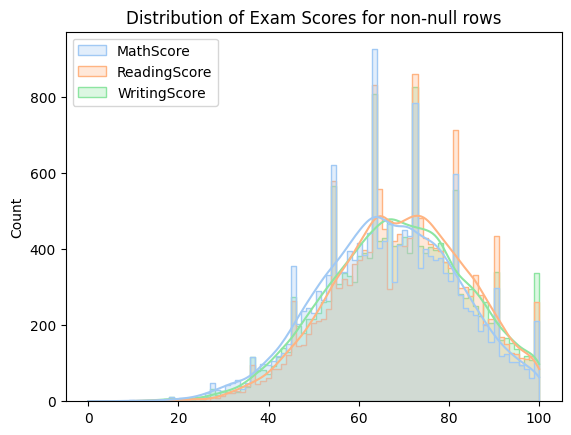

In [13]:
# Create a histogram to visualize the distribution of exam scores
sns.histplot(data_drop_na[NumCols], kde=True, alpha=0.3, element='step')
plt.title('Distribution of Exam Scores for non-null rows');

from the histogram above, it can be seen that the distribution of all three exam scores are skewed to the left with fairly similar mean, median, and distribution.

Since the data is not normally distributed median is preferred to replace any missing data for the numerical values.

### Replacing null values with median for numerical data, and mode for categorical data

In [14]:
# Create a copy of the original data for a clean dataset, to not disturb the original dataset should we need to recover any information
data_clean = data.copy()

# Fill the missing numerical data with median
data_clean[NumCols] = data[NumCols].fillna(data[NumCols].median())

# Fill the missing categorical data with mode
data_clean[CatCols] = data[CatCols].fillna(data[CatCols].mode().iloc[0])

# Look back at the total null values by row, per column
data_clean.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


As can see from above, there are no more null values that can be seen from the dataset, and can proceed with further data cleaning.

## Handling Outliers

There are multiple ways to handle outliers. One of the methods is using the Interquartile Range (**IQR**). To decide on whether a data is an outlier, we can observe the equation:

$$Upper~Fence = Q_3+1.5(IQR)$$
$$Lower~Fence = Q_1-1.5(IQR)$$

Any values which are above the upper fence and below the lower fence, can be classified as outliers. These data points that are classified as outliers have to be relocated and identified on the dataset to see if the values are influential outliers, or if there is a mistake in the entry itself. Once the outliers have been identified, method on how to handle the outliers should be determined, either to remove or to edit the data itself due to errors.

However, in this dataset. The outliers in the math, reading, and writing score play an important role. The outliers mostly are on the lower end of the score range. If these outliers are removed, it would introduce bias towards the higher scorers. Thus, the outliers are meaningful towards the interpretation of the data and will not be removed from the dataset.

In [15]:
# Visualise the top 10 rows of the cleaned dataset
data_clean.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,1,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,1,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,1,private,< 5,37,59,50


From the top 10 rows above, it can be seen that there are roughly no null values, and the coded categories are all correctly coded. For example;

- `PracticeSport` : regularly / sometimes
- `WklyStudyHours` : '< 5' /  '5-10' / '> 10'

no null values are roughly seen, thus the coding is correct.

In [16]:
# Look at the information of the columns
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               30641 non-null  category
 1   EthnicGroup          30641 non-null  category
 2   ParentEduc           30641 non-null  category
 3   LunchType            30641 non-null  category
 4   TestPrep             30641 non-null  category
 5   ParentMaritalStatus  30641 non-null  category
 6   PracticeSport        30641 non-null  category
 7   IsFirstChild         30641 non-null  category
 8   NrSiblings           30641 non-null  category
 9   TransportMeans       30641 non-null  category
 10  WklyStudyHours       30641 non-null  category
 11  MathScore            30641 non-null  int64   
 12  ReadingScore         30641 non-null  int64   
 13  WritingScore         30641 non-null  int64   
dtypes: category(11), int64(3)
memory usage: 1.3 MB


The final dataframe from the cleaned dataset can be seen as above. From that, we can know that;

1. The columns have been coded to the right datatype as mentioned above.
2. There are no columns with null values.
3. The total number of observations (30641) has been preserved, and no rows were dropped.

<a name="visualization"></a>
# Visualization


## Visualizing the completely cleaned dataset

Outlier have been managed, and missing data has been imputed. Thus lets visualise the complete data.

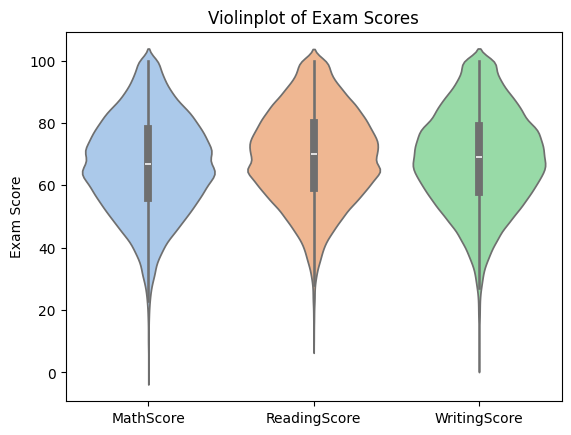

In [17]:
# Plot violinplot to visualize the distribution of the exam scores
sns.violinplot(data_clean[NumCols])
plt.title("Violinplot of Exam Scores")
plt.ylabel('Exam Score');

THe violinplot above shows the distribution of the complete data of 30641 observations after the missing data has been imputed. From the above it can be seen that the scores have fairly similar distribution between Math, Reading, and Writing Exam. The exams also have a fairly similar median, with a skew towards the lower score.

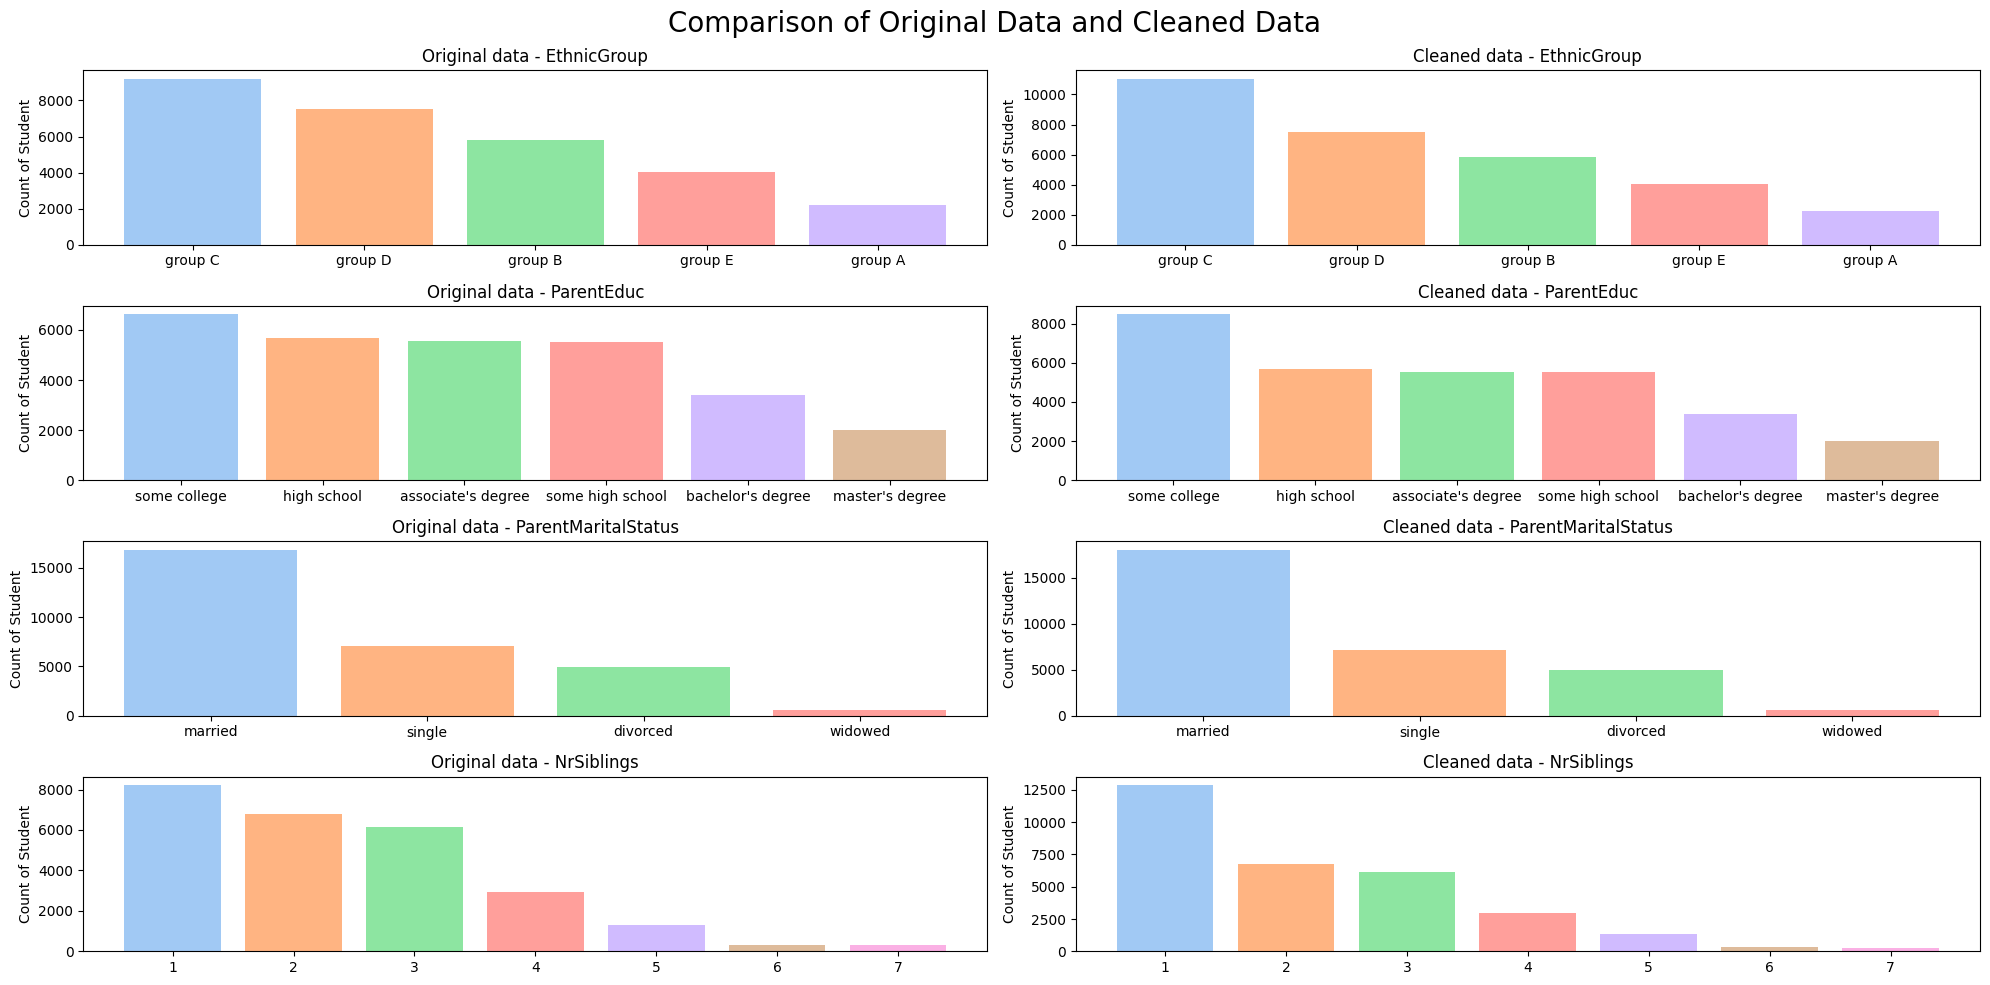

In [18]:
# Separate the Categorical Columns for only those for barplot (Categories >3)
bars = CatCols[[1,2,5,8]]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(bars), ncols=2, figsize=(20, 10))

# Create a title for the main figure
fig.suptitle('Comparison of Original Data and Cleaned Data', fontsize=20)

# Define the pastel color palette
colors = sns.color_palette("pastel", n_colors=10)

# Create a for loop to plot each bar plot
for i, column in enumerate(bars):
    # Plot data
    data_counts = data[column].value_counts()
    axes[i][0].bar(data_counts.index, data_counts.values, color=colors[:len(data_counts)])
    axes[i][0].set_title(f'Original data - {column}')
    axes[i][0].set_xlabel('')
    axes[i][0].set_ylabel('Count of Student')

    # Plot data_clean
    data_clean_counts = data_clean[column].value_counts()
    axes[i][1].bar(data_clean_counts.index, data_clean_counts.values, color=colors[:len(data_clean_counts)])
    axes[i][1].set_title(f'Cleaned data - {column}')
    axes[i][1].set_xlabel('')
    axes[i][1].set_ylabel('Count of Student')

# Adjust layout
plt.tight_layout()
plt.show()

Thus from the comparison of between the original data and the cleaned data. We have successfully imputed the missing values and removed the outliers while preserving the identity of the data. The distribution is roughly still the same, but with more reliable dataset for better exploratory and insights. For example;

> In the Ethnic Group:
> - The original data with missing values, Group C is the mode of the data and Group A is the minority of the data
> - In the cleaned data, the Group C is still the majority of the data, and Group A is still the minority of the data.
> - Thus, the identity/integrity of the data is preserved.

This can be seen similarly throughout all bar plots.

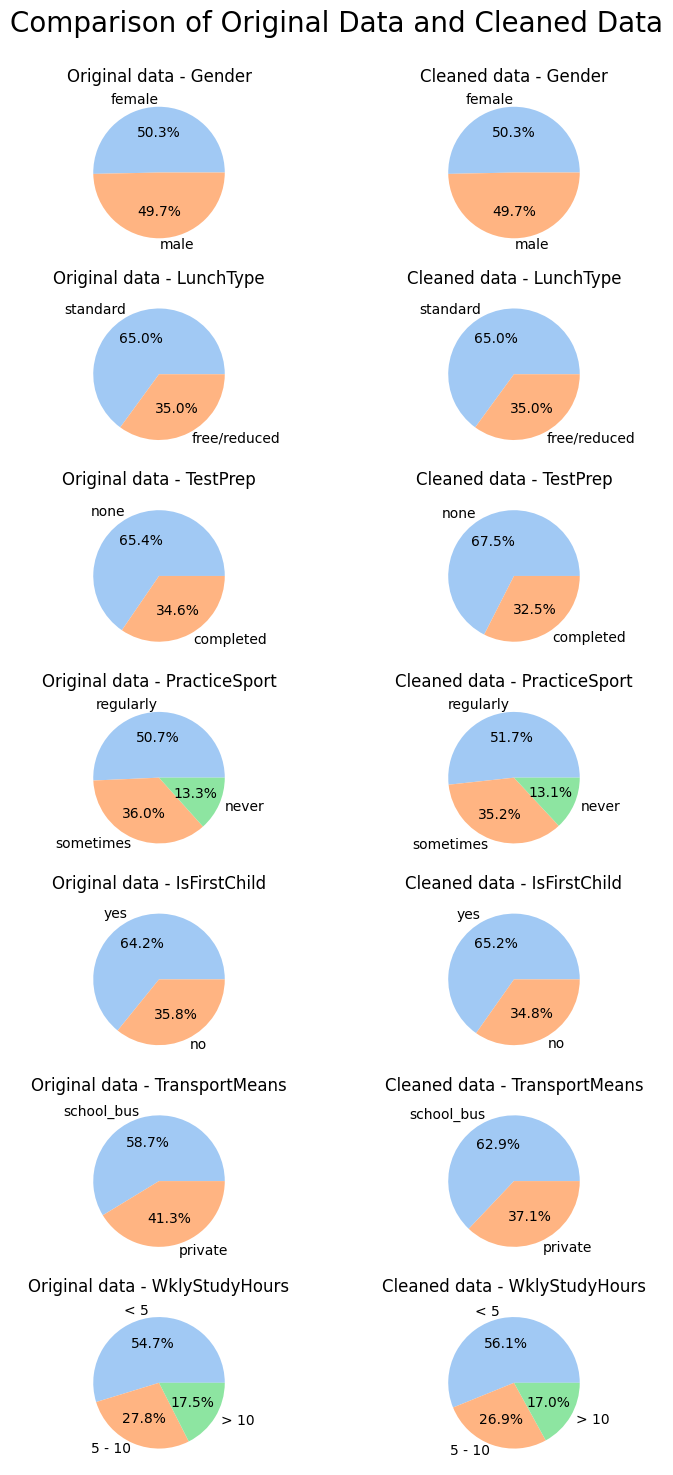

In [19]:
# Separate the Categorical Columns for only those for barplot (Categories <=3)
pies = CatCols[~CatCols.isin(bars)]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(pies), ncols=2, figsize=(8, 15))

fig.suptitle('Comparison of Original Data and Cleaned Data', fontsize=20)

# Define the rainbow color palette
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Create a for loop to produce each pie plot
for i, column in enumerate(pies):
  # Plot data
  data_counts = data[column].value_counts()
  axes[i][0].pie(x=data[column].value_counts(), autopct='%1.1f%%', labels=data[column].dropna().unique())
  axes[i][0].set_title(f'Original data - {column}')
  axes[i][0].set_xlabel('')
  axes[i][0].set_ylabel('')

  # Plot data_clean
  data_clean_counts = data_clean[column].value_counts()
  axes[i][1].pie(x=data_clean[column].value_counts(), autopct='%1.1f%%', labels=data_clean[column].unique())
  axes[i][1].set_title(f'Cleaned data - {column}')
  axes[i][1].set_xlabel('')
  axes[i][1].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Similarly as above with the bar plots, it can be seen that the structure of the data did not change between the original and cleaned data. This can be further highlighted by looking at the percentages of proportion in the pie chart, for example;

> In the Weekly Study Hours Group:
>   - < 5 Hours : 54.7% ⇒ 56.1%
>   - 5 - 10 Hours : 27.8% ⇒ 26.9%
>   - \> 10 Hours : 17.5% ⇒ 17%
>
> It can be seen that the identity/integrity of the data is preserved.

This can be seen similarly throughout all pie charts.

<a name="InE"></a>
# Insights and Explanations

We will narrow down on chosen data from the cleaned dataset and obtain valuable insights. As mentioned above, this section of will comprise of a few subsections namely:

1.   [Descriptive Analytics](#descr-analytics)
2.   [Comparison Analytics](#comp-analytics)




<a name="descr-analytics"></a>
## Descriptive Analytics

### Understanding the distribution of exam scores


In [20]:
# Use the describe function to obtain statistical summary
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


From the table above, it can be seen that that there are 30641 observations as reported above. There are no missing values within each score.

1. Math Score:
> The mean and standard deviation is 66.56 ± 15.36 indicating that students on average perform slightly above mid-range(50). The median is 67 with the 75% of the students obtaining ≤78. The minimum score obtained is 0 with a moderate variability reflected by the standard deviation.

2. Reading Score:
> Studennt achieve slightly higher mean of 69.38 with a median of 70. The minimum score for reading is 10. These shows that generally students are better at reading than in maths. Also with a higher third centile.

3. Writing Score:
> The mean is 68.42, with a median of 69. This shows that writing performance is slightly below reading but higher than math on average. The standard deviation is 15.44, indicating variability comparable to Math Score.

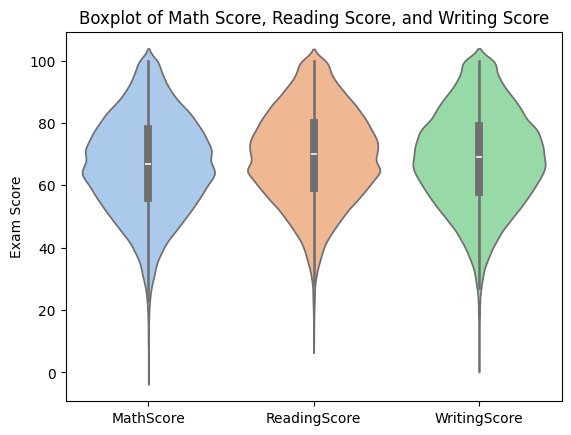

In [21]:
# Visualize the distribution of the exam scores with violin plot
sns.violinplot(data_clean[NumCols])
plt.title("Boxplot of Math Score, Reading Score, and Writing Score")
plt.ylabel('Exam Score')
plt.show()

As can be observed above from the 3 violin plots, the distribution of all 3  test scores can be visualized with fairly normal distribution centered around ~70 with fairly similar distribution and left skewedness.



### Demographic distribution

The dataset can be further brokendown to 3 main sub themes. Firstly is the demographic distribution which contains these columns;

1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
5.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
8.  `NrSiblings`: Number of siblings the student has (0 to 7)









In [22]:
# Create a new subset of the Categorical Columns to look at the demographic details only
demographic = CatCols[[0,1,5,7,8]]
demographic

Index(['Gender', 'EthnicGroup', 'ParentMaritalStatus', 'IsFirstChild',
       'NrSiblings'],
      dtype='object')

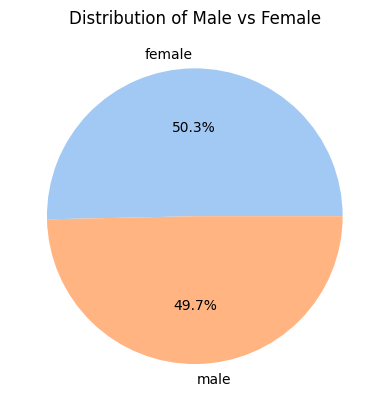

In [23]:
# Plot a pie chart with its respective titles
plt.pie(x=data_clean['Gender'].value_counts(), autopct='%1.1f%%', labels=data_clean['Gender'].unique())
plt.title('Distribution of Male vs Female')
plt.show()

The data contains a fairly equal distribution of male and female students

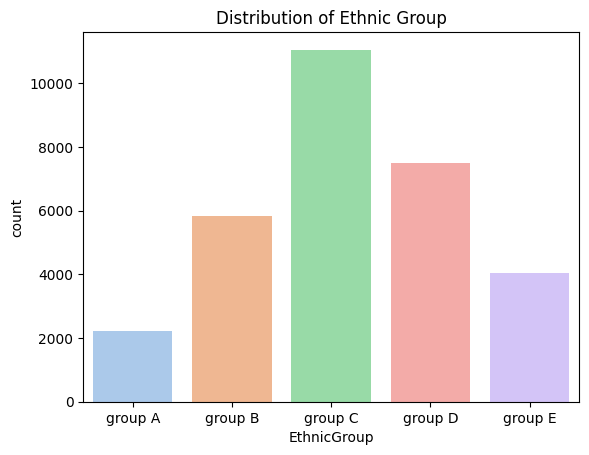

In [24]:
# Create a bar plot for ethnic group distribution
sns.countplot(data=data_clean,x='EthnicGroup', hue='EthnicGroup')
plt.title("Distribution of Ethnic Group")
plt.show()

There are majority students from Group C ethnicities, followed by group D, and group B. Group A ethnicities is the minority in the dataset.

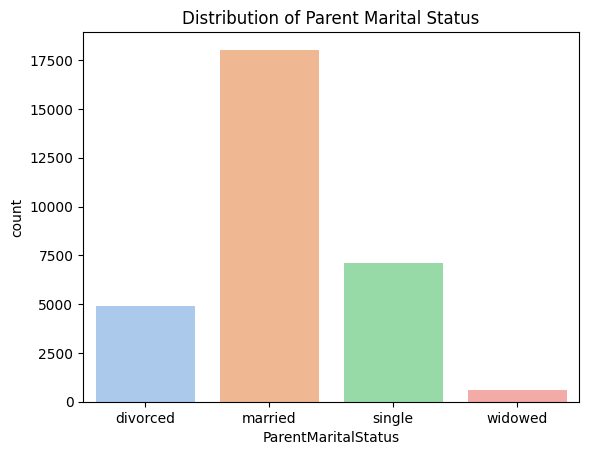

In [25]:
# Create a bar plot for Parent Marital Status distribution plot
sns.countplot(data=data_clean,x='ParentMaritalStatus', hue='ParentMaritalStatus')
plt.title("Distribution of Parent Marital Status")
plt.show()

Most of the parents of the students in the datasett are married with a small fraction who are divorced and widowed.

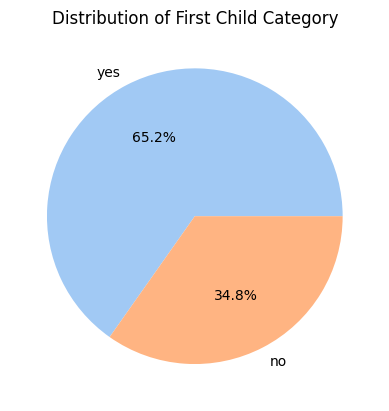

In [26]:
# Create a pie chart for the distribution of first child category among students.
plt.pie(x=data_clean['IsFirstChild'].value_counts(), autopct='%1.1f%%', labels=data_clean['IsFirstChild'].unique())
plt.title('Distribution of First Child Category')
plt.show()

Most of the students (65.2%) in the dataset are first child in their family.

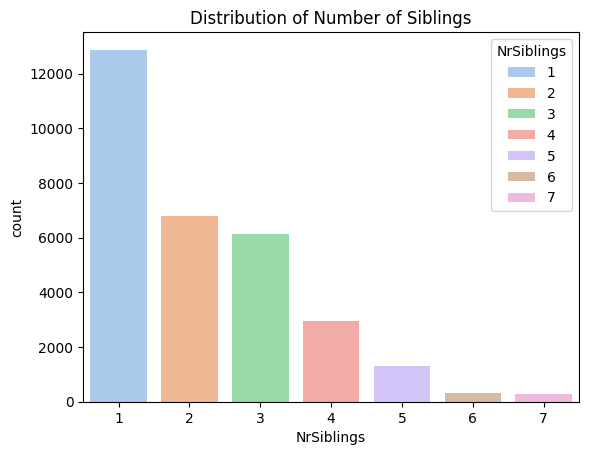

In [27]:
# Create a bar plot for distribution of number of siblings
sns.countplot(data=data_clean,x='NrSiblings', hue='NrSiblings')
plt.title("Distribution of Number of Siblings")
plt.show()

The distribution of sibling number of the students is not normally distributed, it is skewed to the right with most of the students being an only child.

### Socioeconomic distribution

Secondly, the theme that can be grouped together is the socioeconomic factors which contain;

1.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
2.  `LunchType`: School lunch type (standard or free/reduced)
3.  `TransportMeans`: Means of transport to school (schoolbus/private)

In [28]:
# Similarly as above, create a subset from the Categorical Columns to create another subset that contains socioeconomic factors
socio = CatCols[[2,3,9]]
socio

Index(['ParentEduc', 'LunchType', 'TransportMeans'], dtype='object')

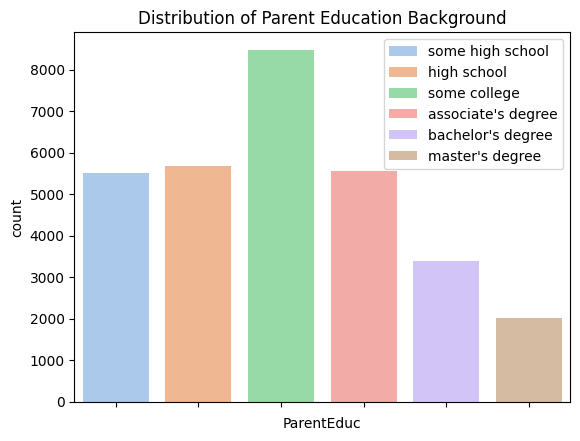

In [29]:
# Create a bar chart that shows the distribution of parent education background
ax = sns.countplot(data=data_clean,x='ParentEduc', hue='ParentEduc', legend=True)
ax.legend(loc='upper right')
ax.set_xticklabels('')
plt.title('Distribution of Parent Education Background')
plt.show()

Most of the parents of the students in the dataset have some college education, followed by highschool. A small minority of parents have education up to master's degree.

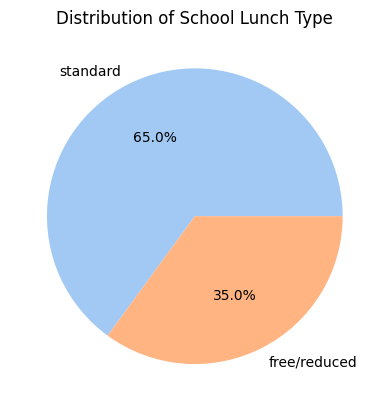

In [30]:
# Create a pie chart for School Lunch Type distribution
plt.pie(x=data_clean['LunchType'].value_counts(), autopct='%1.1f%%', labels=data_clean['LunchType'].unique())
plt.title('Distribution of School Lunch Type')
plt.show()

Only 34.8% of the students in the dataset take free/reduced price lunch during the education. The remaining 65.2% take standard lunch type.

The students' access to different lunch types may reflect on the socioeconomic status of the students. Those who take standard lunch may be more priviledge as compared to the other students that take free/reduced price lunches.

### Analyze  habits

Last theme is to analyze the habits of these students through these practices;


1.  `TestPrep`: Test preparation course followed (completed or none)
2.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
3. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)*italicized text*

In [31]:
# Similarly create a subset of the Categorical Column to subset the habits from the original list
habits = CatCols[[4,6,10]]
habits

Index(['TestPrep', 'PracticeSport', 'WklyStudyHours'], dtype='object')

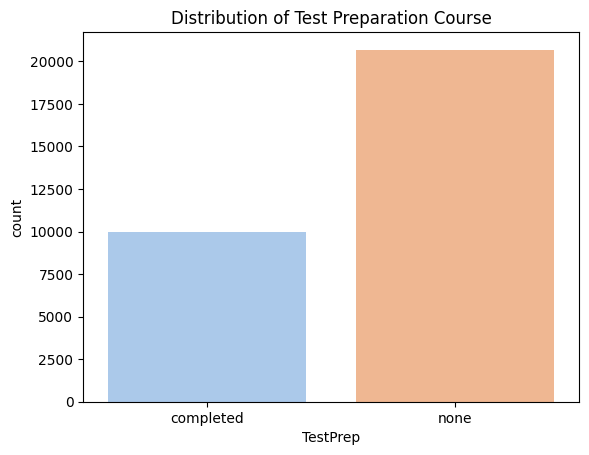

In [32]:
# Create a bar plot for distribution of students that take test preparation course
sns.countplot(data=data_clean,x='TestPrep', hue='TestPrep')
plt.title("Distribution of Test Preparation Course")
plt.show()

A majority of the students did not complete the test preparation course.

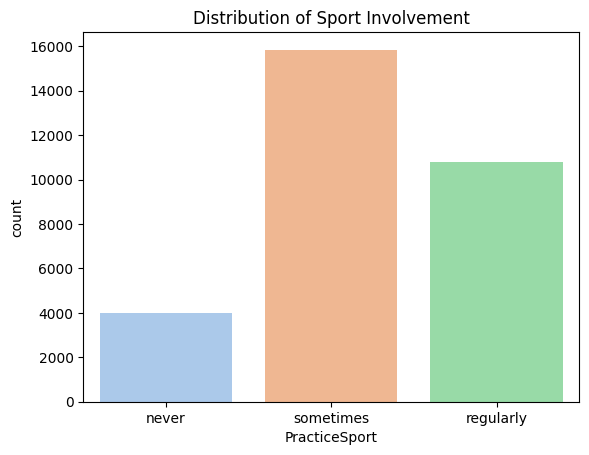

In [33]:
# Create a bar chart for distribution of Sports Involvement
sns.countplot(data=data_clean,x='PracticeSport', hue='PracticeSport')
plt.title("Distribution of Sport Involvement")
plt.show()

Most of the students only practice sports sometimes, and some more regular than others. While only a minority of the students dont practice sports.

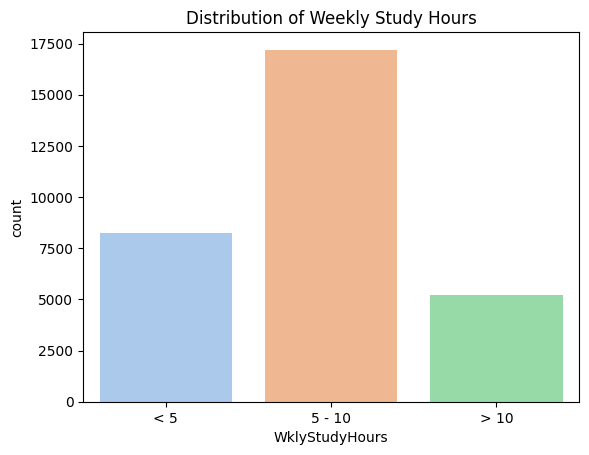

In [34]:
# Create bar chart to visualize distribution of weekly study hours among students
sns.countplot(data=data_clean,x='WklyStudyHours', hue='WklyStudyHours')
plt.title("Distribution of Weekly Study Hours")
plt.show()

Most of the students study between 5-10 hours per week, followed by <5 hours per week, and >10 hours per week

<a name="comp-analytics"></a>
## Comparison Analytics

### Are there any interacting features that affect score?

#### Math Score

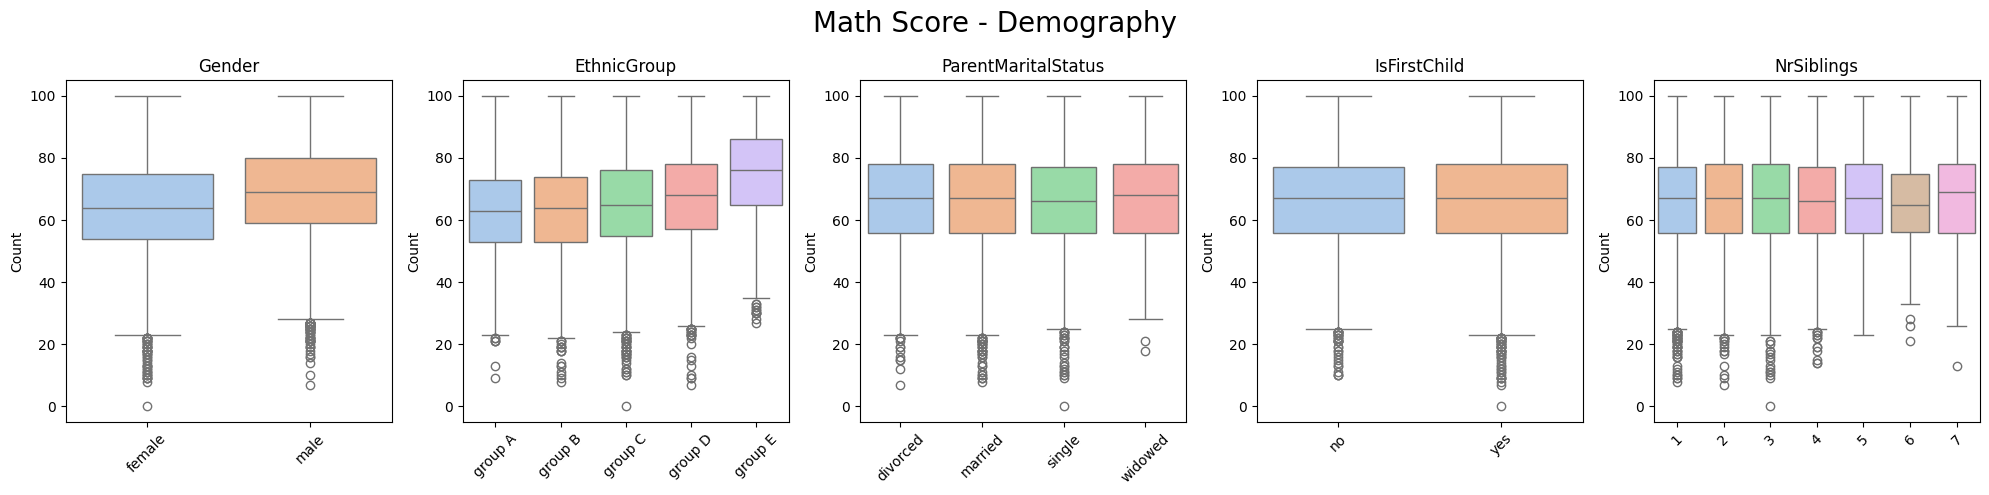

In [35]:
# Create a figure with 1 row and 5 columns of subplots, and set the overall figure size
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Add a title to the entire figure
fig.suptitle('Math Score - Demography', fontsize=20)

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each demographic column and plot a boxplot
for i, cols in enumerate(demographic):

    # Build the plot
    sns.boxplot(data=data_clean, x=cols, y='MathScore', ax=axes[i], hue=cols, legend=False)
    axes[i].set_title(cols)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout to prevent overlapping elements and show plots
plt.tight_layout()
plt.show()

1. Males show a higher math score compared to females.
2. Ethnic E shows higher maths score as well

Otherwise, other factors within demography showed not much variation between groups.



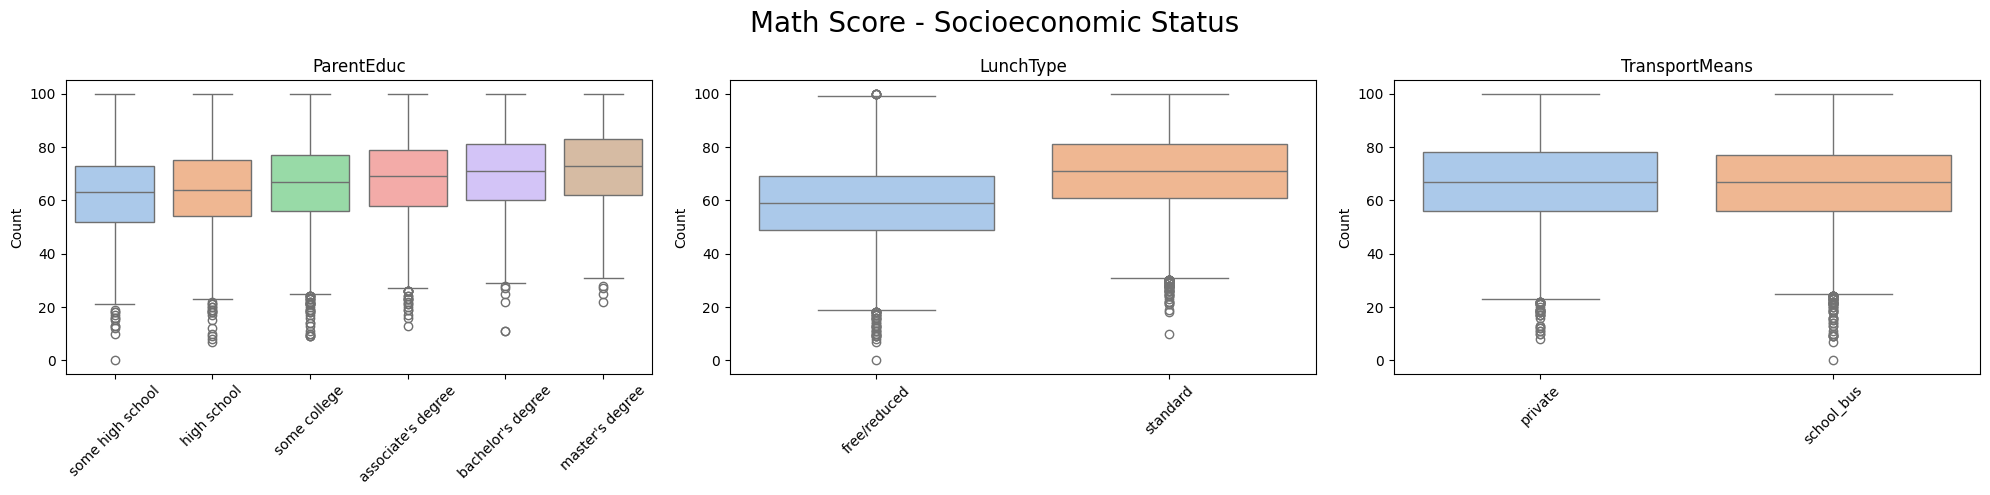

In [36]:
# Create a figure with 1 row and 3 columns of subplots, and set the overall figure size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Set a main title for the plot
fig.suptitle('Math Score - Socioeconomic Status', fontsize=20)

# Flatten the axes array for to make it easier to iterate over
axes = axes.flatten()

# Start the iteration for each item in the socioeconomic factor
for i, cols in enumerate(socio):

  # Create the plot
  sns.boxplot(data=data_clean,x=cols, y='MathScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up the and show the plot
plt.tight_layout()
plt.show()

From the plots above, it can be seen that socioeconomic status such as ;

1. Parents Education Level
2. Lunch Types of the students

these factors may affect the math score. Those, more well off may reflect higher maths score.

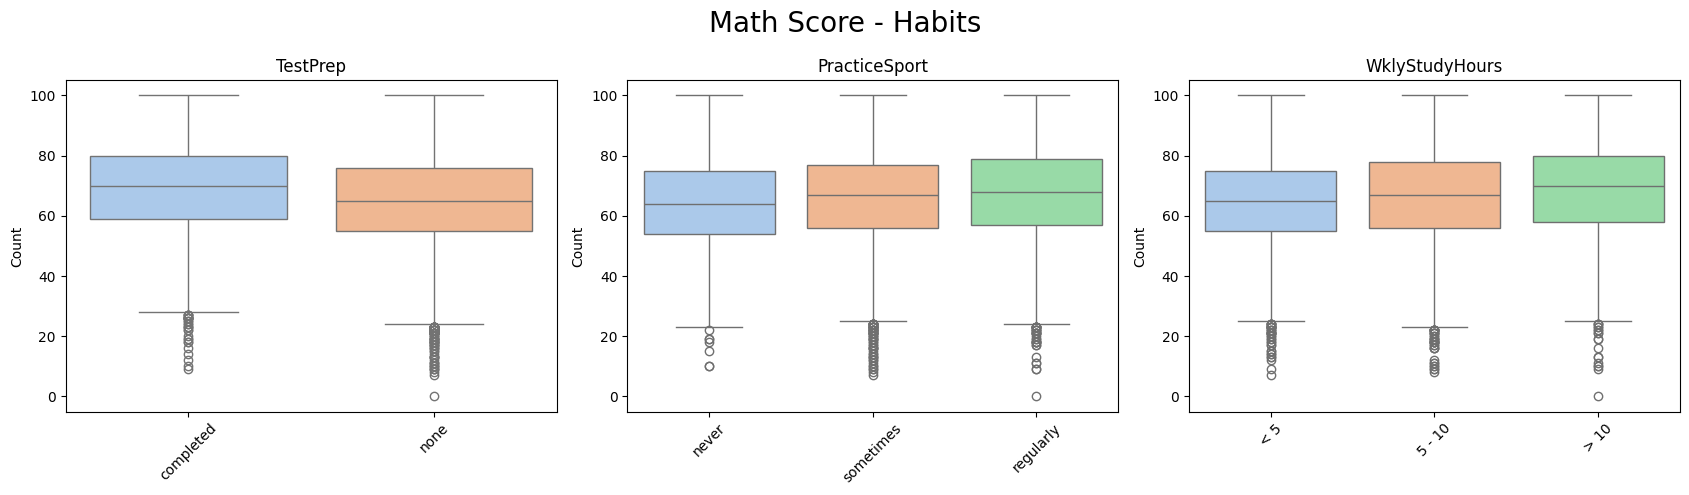

In [37]:
# Create main plot with 1 row and 3 cols and set a size for the figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

# Create a main title for the plot
fig.suptitle('Math Score - Habits', fontsize=20)

# Flatten to make it easier to iterate over
axes = axes.flatten()

# Create a for loop to iterate for plot building
for i, cols in enumerate(habits):

  # The main plot function to iterate each part of the habits sub-theme
  sns.boxplot(data=data_clean,x=cols, y='MathScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up and show the plot
plt.tight_layout()
plt.show()

Completion of test preparation showed slight improvement in maths score whie the other components also show slight variation but none that stand out too much.

#### Reading Score

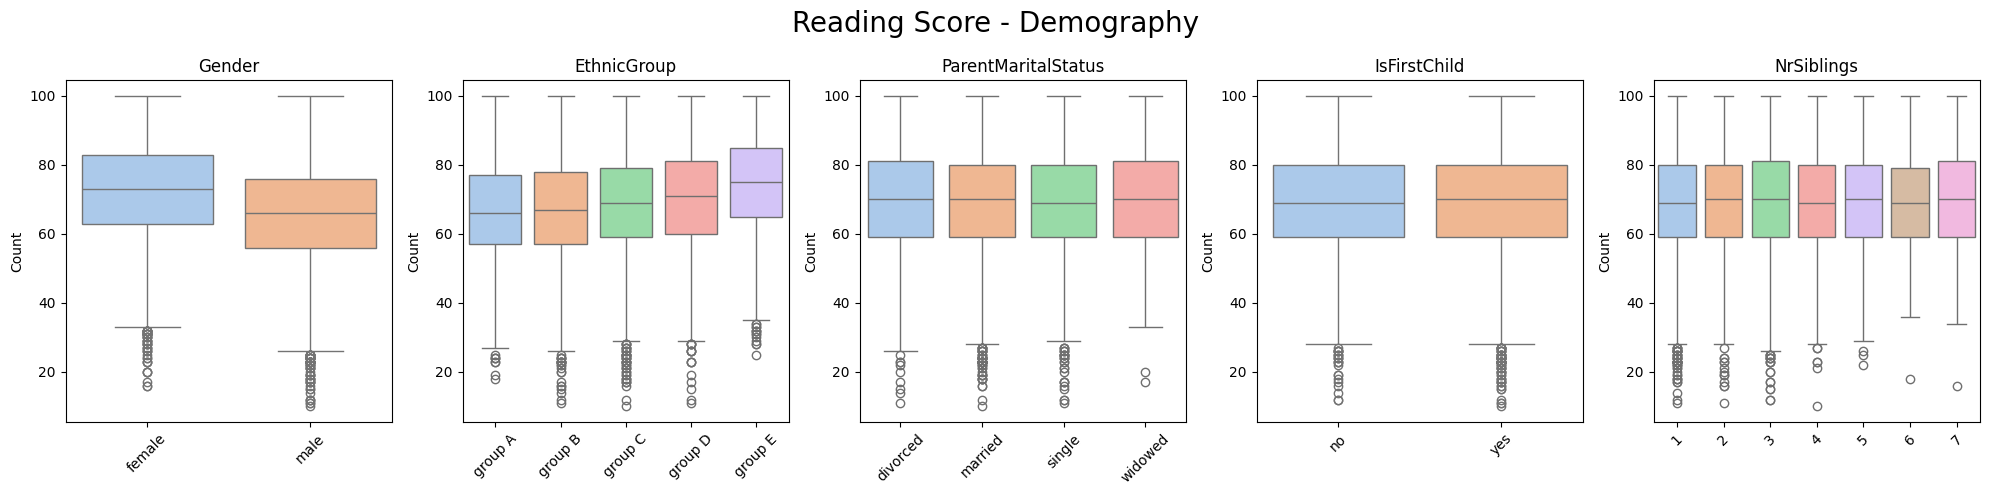

In [38]:
# Create the main plot size and set the number of rows and columns
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Create main title for the plot
fig.suptitle('Reading Score - Demography', fontsize=20)

# Flatten the axes to make it easier to iterate over
axes = axes.flatten()

# Initiate the for loop
for i, cols in enumerate(demographic):

  # Main plot building
  sns.boxplot(data=data_clean,x=cols, y='ReadingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up and show the plots
plt.tight_layout()
plt.show()

In the reading score, females and ethnic group E shows a higher score.

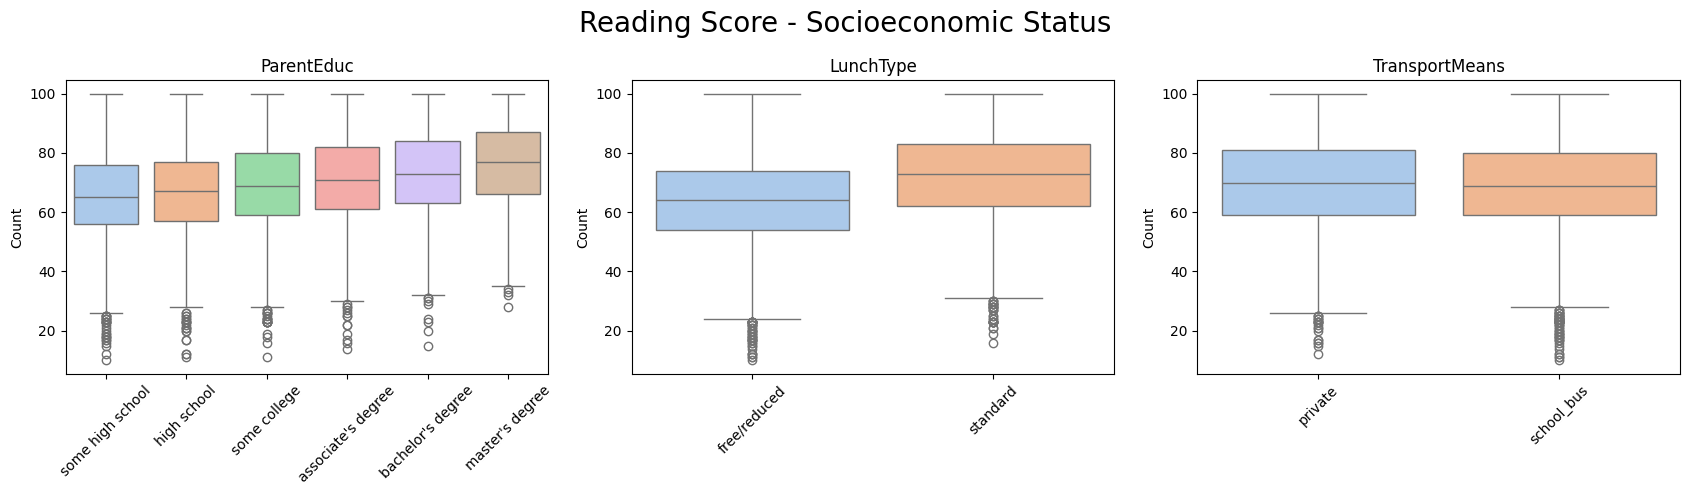

In [39]:
# Create the main figure to set the size and number of cols and rows
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

# Create main title for the plot
fig.suptitle('Reading Score - Socioeconomic Status', fontsize=20)

# Flatten the axis to make it easier to iterate over
axes = axes.flatten()

# Create for loop to iterate over each component to create each subsequent plots
for i, cols in enumerate(socio):

  # Main plot
  sns.boxplot(data=data_clean,x=cols, y='ReadingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up and show the plot
plt.tight_layout()
plt.show()

Socioeconomic status also may play a role in readcing score as highlighted that students with parents that have a higher education background tend to have higher reading score. Lunch type also may reflect on socioeconomic status which shows higher reading score in more privileged students.

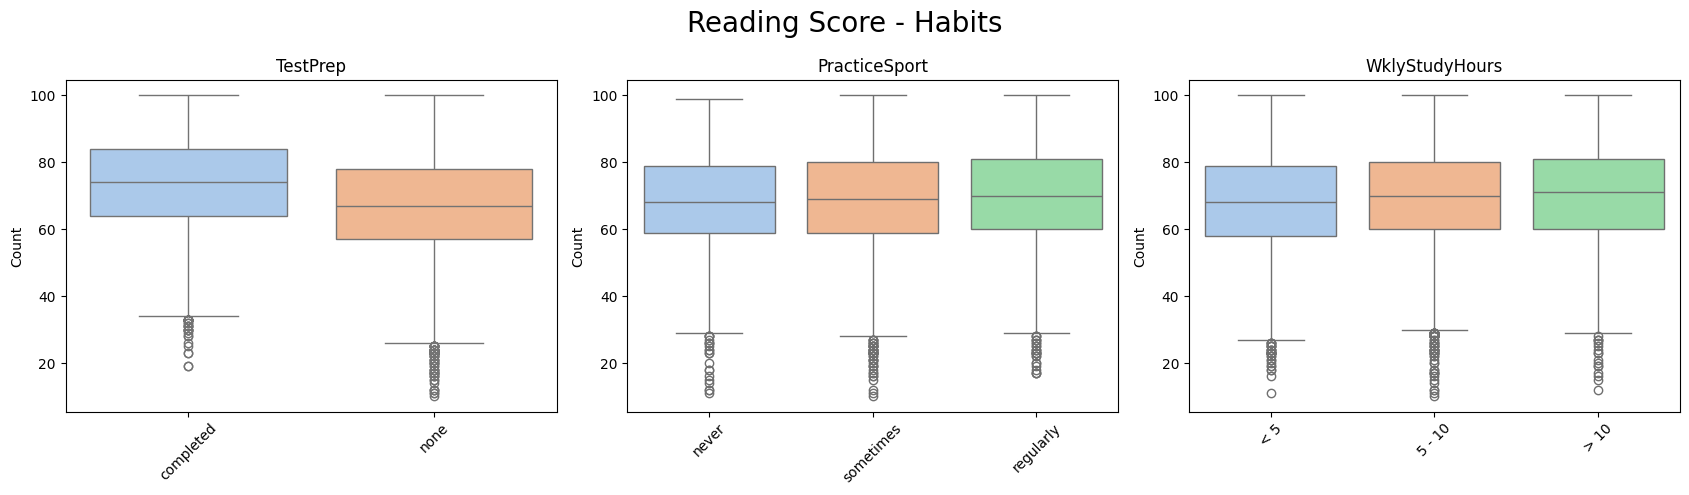

In [40]:
# Create a figure with 1 row and 3 columns of subplots, and set the overall figure size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

# Add a title to the entire figure
fig.suptitle('Reading Score - Habits', fontsize=20)

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each habit column and plot a boxplot
for i, cols in enumerate(habits):

    # Create a boxplot for each habit feature against 'ReadingScore'
    sns.boxplot(data=data_clean, x=cols, y='ReadingScore', ax=axes[i], hue=cols, legend=False)
    axes[i].set_title(cols)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up and show the plots
plt.tight_layout()
plt.show()


Habits also does not show much variation in score except for completion of test preparation programme which shows higher reading score in those who complete the test preparation programme.

#### Writing Score

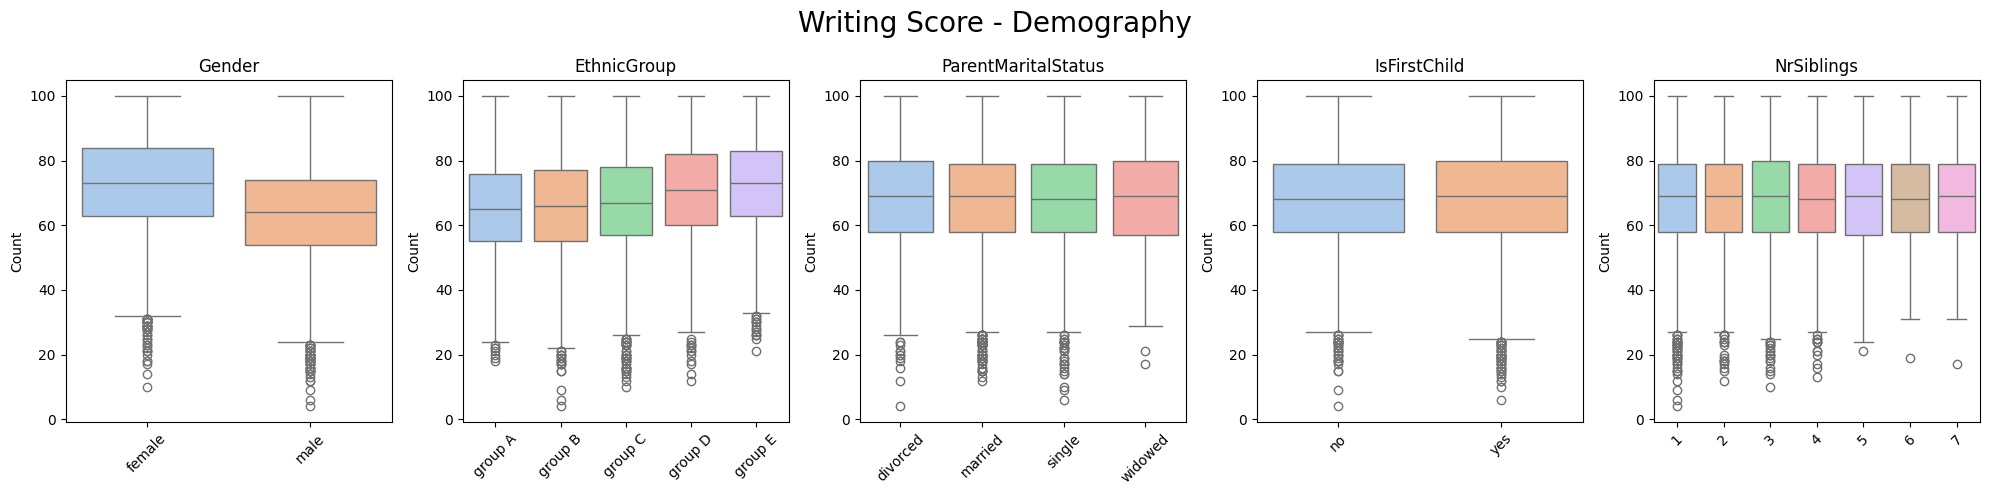

In [41]:
# Create figure to set size and number of cols and rows
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Create a main title for the plots
fig.suptitle('Writing Score - Demography', fontsize=20)

# Flatten the axis to make it easier to iterate over
axes = axes.flatten()

# Create a for loop to iterate over
for i, cols in enumerate(demographic):

  # Main plot building
  sns.boxplot(data=data_clean,x=cols, y='WritingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up and show the plot
plt.tight_layout()
plt.show()


From the graphs above, it can be seen like the reading score, females and group E ethnics tend to score higher than males

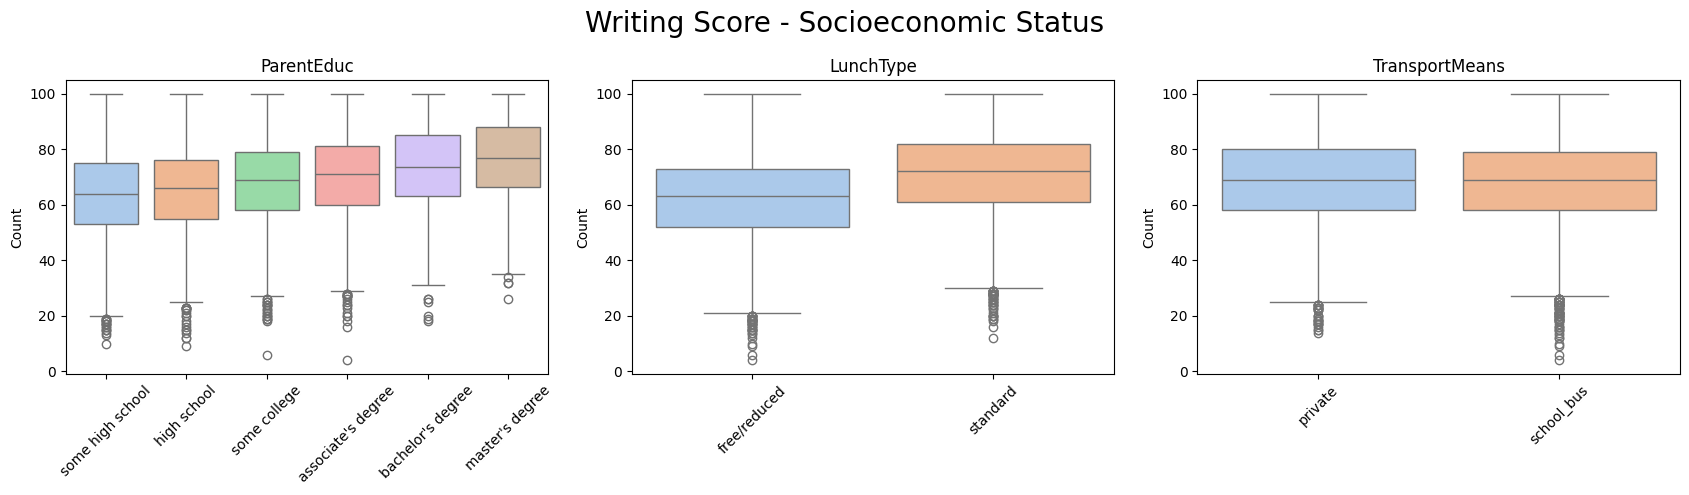

In [42]:
# Create main figure to set size and number of columns and rows
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

# Set a main title for the figure
fig.suptitle('Writing Score - Socioeconomic Status', fontsize=20)

# Flatten the axes to make it easier to iterate over
axes = axes.flatten()

# Initiate the for loop
for i, cols in enumerate(socio):

  # Main plot building
  sns.boxplot(data=data_clean,x=cols, y='WritingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# TIdy up and show the plot
plt.tight_layout()
plt.show()

Students with parents that are more educated and more priviledged tend to perform better in writing exams

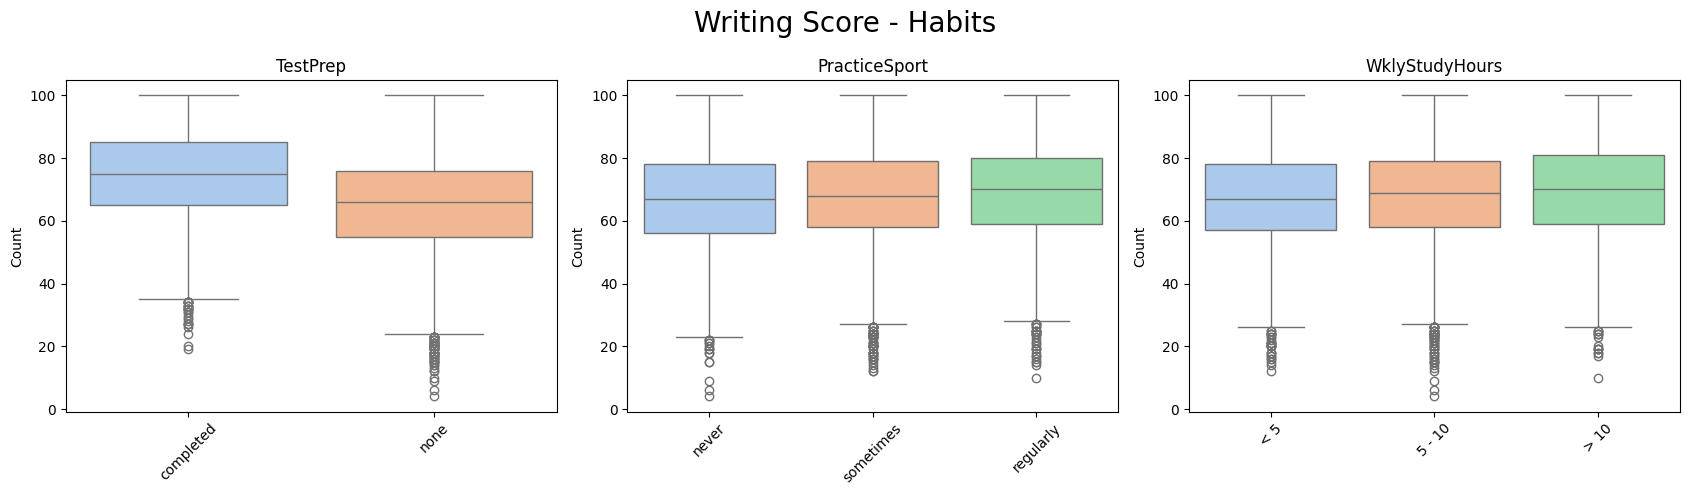

In [43]:
# Create main figure to set size and number rows and columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

# Create main title for the figure
fig.suptitle('Writing Score - Habits', fontsize=20)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Initiate the for loop
for i, cols in enumerate(habits):

  # Main plot
  sns.boxplot(data=data_clean,x=cols, y='WritingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('Count')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Tidy up and show the plots
plt.tight_layout()
plt.show()

Test preparation also shows positive effect on the writing score as compared to other features.


### Relationship between Exam Scores

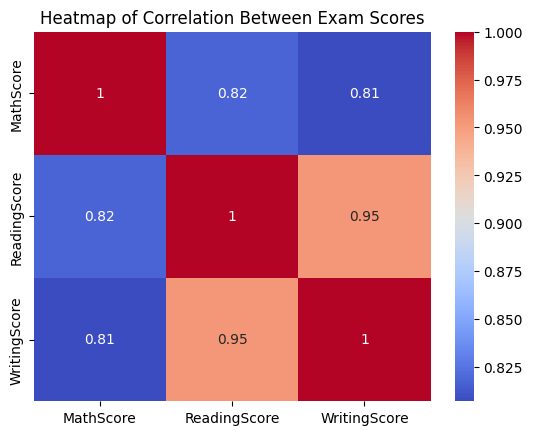

In [44]:
# Create a correlation heatmap to visualize the relationship between the exam scores towards each other
sns.heatmap(data_clean[NumCols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Between Exam Scores")
plt.show()

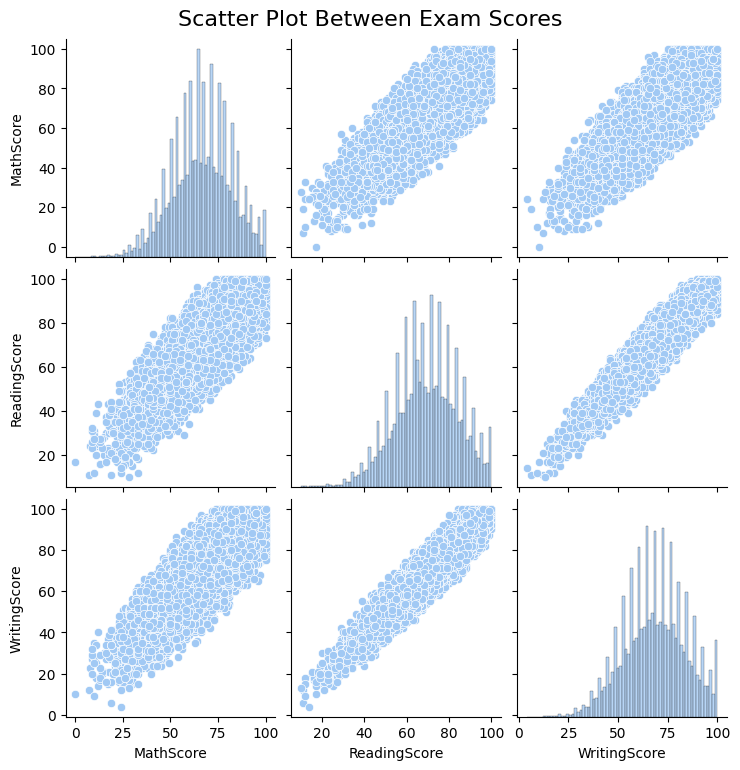

In [45]:
# Create a pair plot to visualize the pattern of relationship between each exam scores towards each other
pair = sns.pairplot(data_clean[NumCols])
pair.fig.suptitle('Scatter Plot Between Exam Scores', y=1.02, fontsize=16)
plt.show()

From the correlation matrix and the scatterplot, it can be seen that the exam scores are highly correlated with each other. Particularly between the reading score and writing score. Students who perform well on one exam will tend to perform well on the other exams as well.

### Identify key predictors of academic success

From the plots above, it can be seen that certain features may become key predictors for academic success. It can be categorised according to exams.

1. Gender (Demography)
2. Lunch Type (Socioeconomic Status)
3. Test Preparation (Habits)
4. Other exams

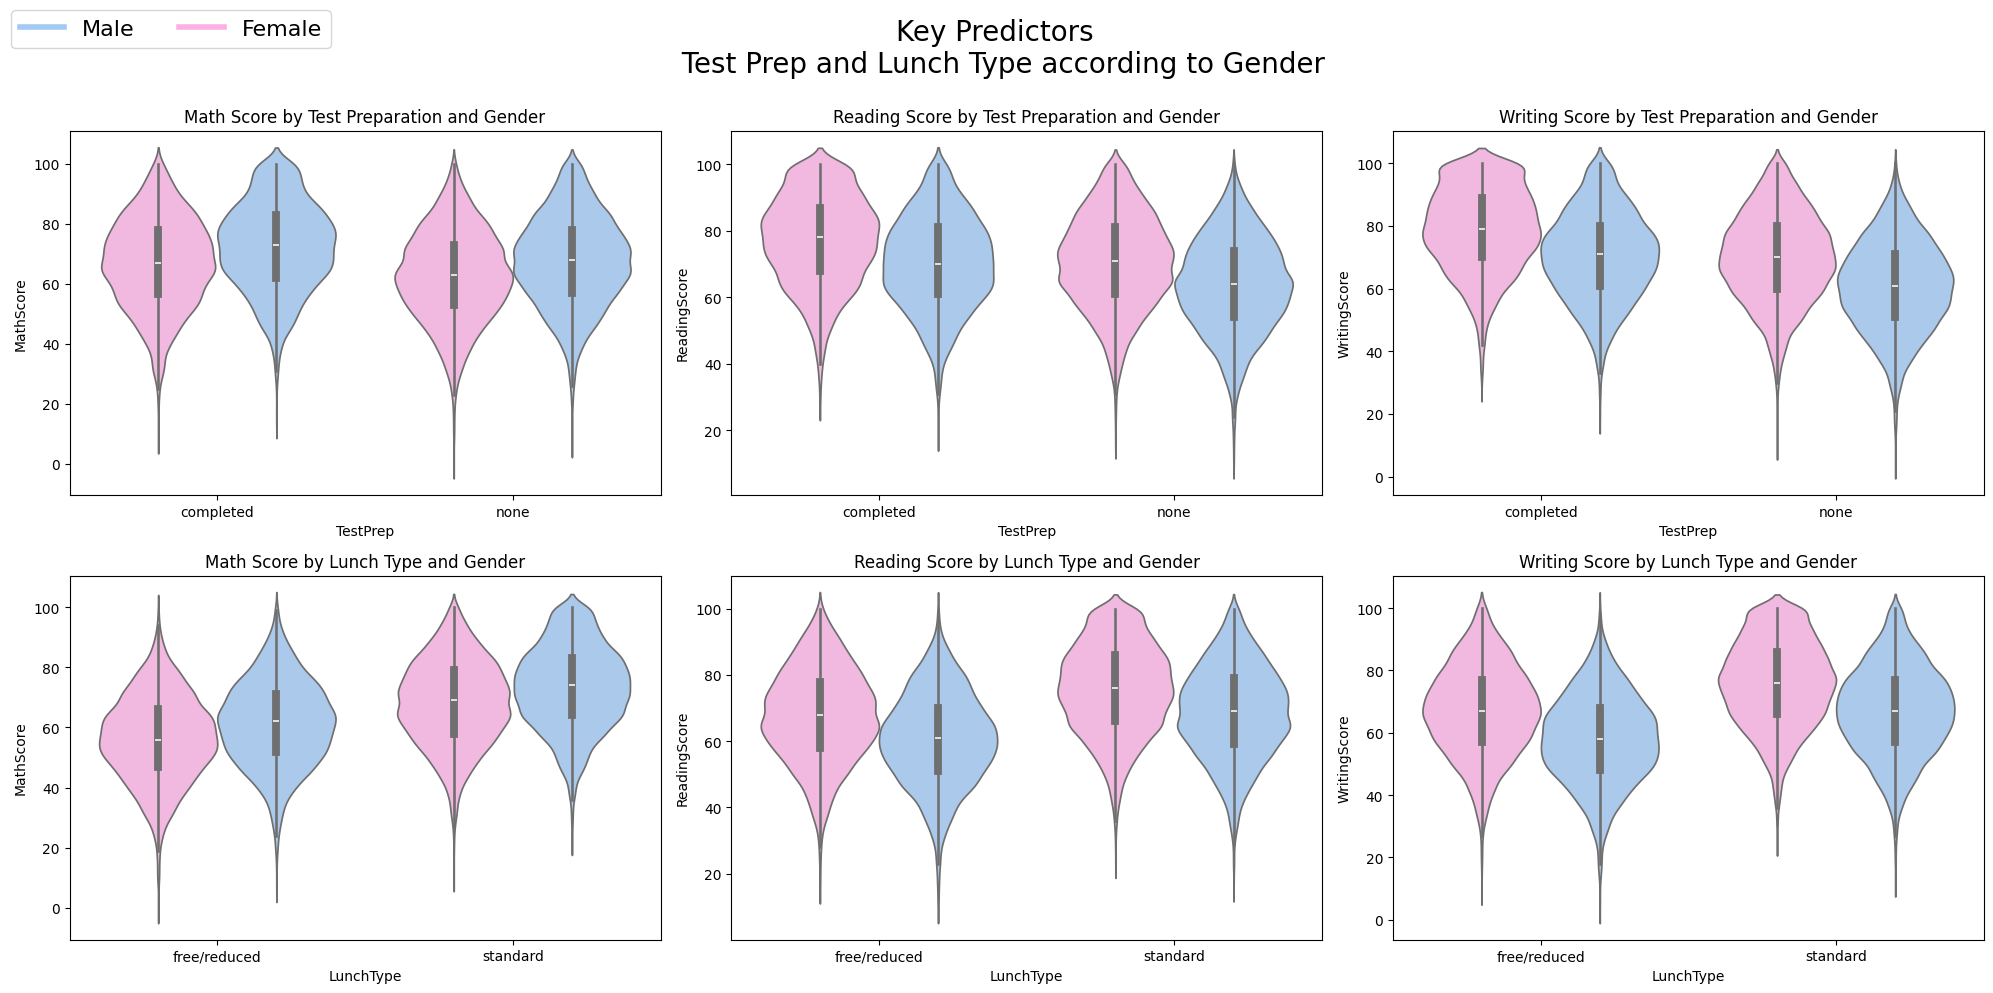

In [46]:
# Plot main figure
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Key Predictors \n Test Prep and Lunch Type according to Gender', fontsize=20)
ax = ax.flatten()

# Define palette
custom_palette = { 'male': sns.color_palette()[0], 'female': sns.color_palette()[6] , 'completed' : sns.color_palette()[2], 'none' : sns.color_palette()[7]}


# Test Prep Plot
sns.violinplot(data=data_clean, x='TestPrep', y='MathScore', hue='Gender', ax=ax[0], palette = custom_palette)
ax[0].set_title('Math Score by Test Preparation and Gender')

sns.violinplot(data=data_clean, x='TestPrep', y='ReadingScore', hue='Gender', ax=ax[1], palette = custom_palette)
ax[1].set_title('Reading Score by Test Preparation and Gender')

sns.violinplot(data=data_clean, x='TestPrep', y='WritingScore', hue='Gender', ax=ax[2], palette = custom_palette)
ax[2].set_title('Writing Score by Test Preparation and Gender')

# Lunch Type Plot
sns.violinplot(data=data_clean, x='LunchType', y='MathScore', hue='Gender', ax=ax[3],palette = custom_palette)
ax[3].set_title('Math Score by Lunch Type and Gender')

sns.violinplot(data=data_clean, x='LunchType', y='ReadingScore', hue='Gender', ax=ax[4],palette = custom_palette)
ax[4].set_title('Reading Score by Lunch Type and Gender')

sns.violinplot(data=data_clean, x='LunchType', y='WritingScore', hue='Gender', ax=ax[5],palette = custom_palette)
ax[5].set_title('Writing Score by Lunch Type and Gender')

# Iterate through each axes to remove the legends
for a in ax:
  a.legend_.remove()

# Create custom legend
custom_handles = [plt.Line2D([0], [0], color=sns.color_palette()[0], lw=4, label='Male'),
                  plt.Line2D([0], [0], color=sns.color_palette()[6], lw=4, label='Female')]

# Insert the legend into the plot
fig.legend(handles=custom_handles, loc='upper left', ncol=4, fontsize=16)

# Tidy and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

From the plots above, it can be seen that although Socioeconomic and Habits may influence the test scores. A pattern can be seen between males and females irregardless of socioeconomic and habit factors.

Females tend to have higher reading and writing score compared to males, while males tend to have higher math score compared to females, irregardless of other factors. This is further elaborated by numerous studies where the comparison of gender differences in academic achievement, particularly in mathematics, reading, and writing, has been a significant area of research in educational psychology.

Findings from various studies to elucidate the nuances of gender disparities in these domains have been studied heavily. Historically, boys have been reported to outperform girls in mathematics, particularly in tasks requiring higher cognitive demands (Ngware et al., 2012). However, recent studies indicate a shift, with girls achieving comparable or even superior scores in mathematics(Milovanović, 2020; Goetz et al., 2013). However, our analysis still favours and agrees with the former statement that boys tend to achieve better scores in mathematics.

In contrast, reading and writing scores tend to favour female students, as is with our analysis. Research consistently shows that girls outperform boys in reading and writing assessments (Lee, 2013; Pope & Sydnor, 2010). For example, Lee's study demonstrated that female students with positive attitude towards writing achieved higher scores than their male counterparts, who exhibited lower performance despite similar engagement levels (Lee, 2013). Nonetheless, findings from Reynolds et al. indicate that while girls generally excel in language arts, the differences in achievement may not be as pronounced in standardised tests, suggesting that teacher assessments may reflect biases favouring female students in these subjects (Reynolds et al., 2015; Voyer & Voyer, 2014).

Overall, while gender differences in academic achievement persist, the landscape is evolving. Girls are closing the gap in mathematics, influenced by factors such as teacher perceptions, while they continue to outperform boys in reading and writing. Understanding these dynamics requires a multifaceted approach that considers psychological, cultural, and educational influences, and one of these factors is privilege which will be discussed next.

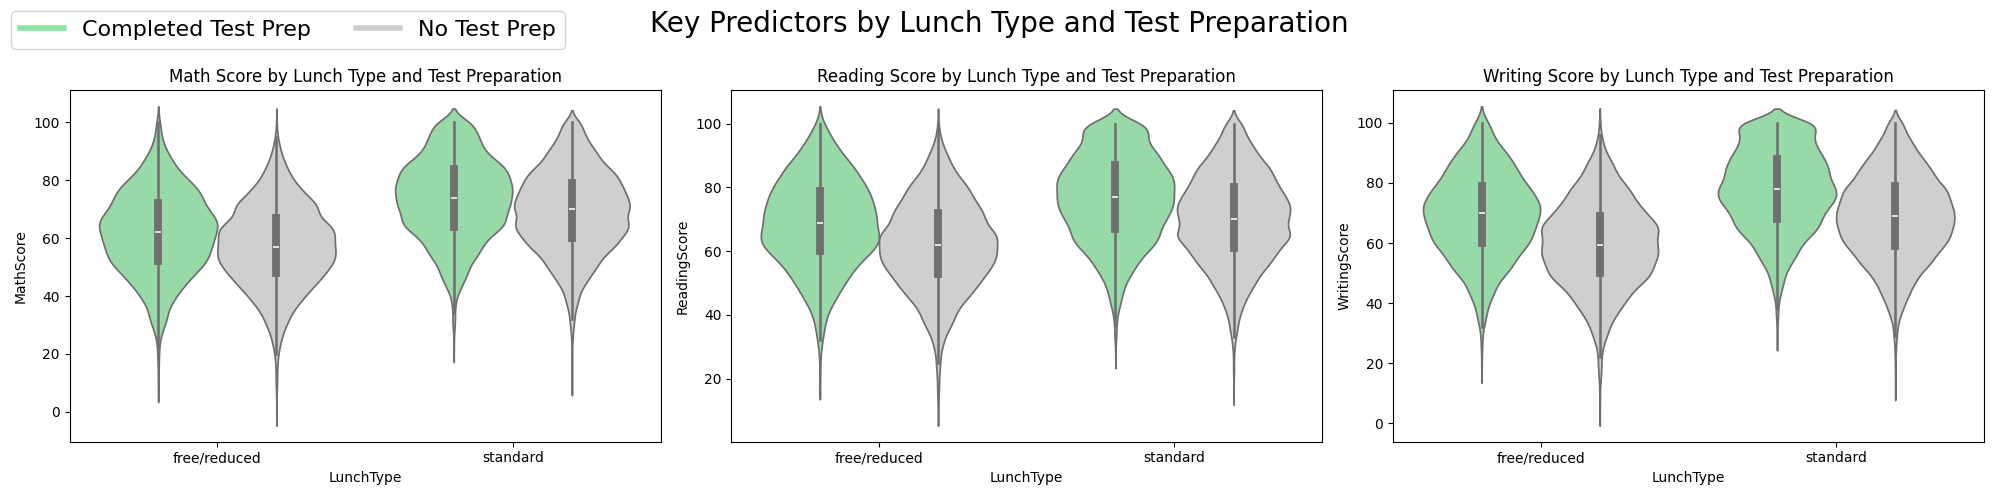

<Figure size 640x480 with 0 Axes>

In [47]:
# Plot main figure

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Key Predictors by Lunch Type and Test Preparation', fontsize=20)
ax = ax.flatten()

# Define palette
custom_palette = { 'male': sns.color_palette()[0], 'female': sns.color_palette()[6] , 'completed' : sns.color_palette()[2], 'none' : sns.color_palette()[7]}


# Main Plot
sns.violinplot(data=data_clean, x='LunchType', y='MathScore', hue='TestPrep', ax=ax[0], palette = custom_palette)
ax[0].set_title('Math Score by Lunch Type and Test Preparation')

sns.violinplot(data=data_clean, x='LunchType', y='ReadingScore', hue='TestPrep', ax=ax[1], palette = custom_palette)
ax[1].set_title('Reading Score by Lunch Type and Test Preparation')

sns.violinplot(data=data_clean, x='LunchType', y='WritingScore', hue='TestPrep', ax=ax[2], palette = custom_palette)
ax[2].set_title('Writing Score by Lunch Type and Test Preparation')

# Iterate through each axes to remove the legend
for a in ax:
  a.legend_.remove()

# Create custom legend
custom_handles = [plt.Line2D([0], [0], color=sns.color_palette()[2], lw=4, label= 'Completed Test Prep'),
                  plt.Line2D([0], [0], color=sns.color_palette()[7], lw=4, label= 'No Test Prep')]

# Place the legend in the plot
fig.legend(handles=custom_handles, loc='upper left', ncol=4, fontsize=16)

# Tidy the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
plt.clf()

When gender is removed from the picture. It can be seen that those of the more priviledged background tend to score higher.

While privilege cannot be explicitly measured, by comparing socioeconomic status (SES), we can have a rough idea of the status of privilege that separates students. Having access to standard lunches instead of subsidised lunches (often targeted towards lower-income families), the disparity of exam scores between these two groups becomes apparent regardless of gender. It may reflect the SES of these students.  Research indicates that students from higher socioeconomic backgrounds benefit from a plethora of resources that enhance their learning experiences. For instance, parents with higher SES are more likely to provide educational support, including access to books, tutoring, and extracurricular activities, which significantly contribute to their children's academic success (Shala, 2018; Bhat et al., 2016). Conversely, students from lower SES backgrounds often face barriers that hinder their education, such as inadequate school facilities and limited parental involvement due to economic pressures ("Beyond the Classroom: Mapping the Terrain of High School Achievement through Student-Teacher Interactions, Socioeconomic Realities, and School Facilities", 2024). This disparity underscores the argument that educational success is not solely a product of individual effort but is heavily influenced by the privileges afforded by one's socioeconomic status.

Additionally, the impact of privilege on educational aspirations and expectations is significant. Studies have shown that children from affluent families tend to have higher educational aspirations and expectations compared to their less privileged peers (Yan & Cai, 2022). This disparity can lead to a self-fulfilling prophecy, where students from lower SES backgrounds may internalise lower expectations, thus affecting their motivation and academic performance (Arfayan, 2023).

However, when combining effort (better habits - completing test preparation) with privilege (standard lunch types) it can be seen that those students excel the best amongst their peers. This shows that habits may play an important role in driving the success of these students. Despite, there seem to be an underlying connection between privilege and habits which divides those privileged and performing, with those privileged but underperforming. This connection may reflect on inherent intrinsic motivation. There is always an intricate relationship between intrinsic motivation, habits, and educational outcomes. Intrinsic motivation refers to the drive to engage in activities for their inherent satisfaction, while habits encompass the regular practices and routines that influence learning behaviours. Nonetheless, intrinsic motivation is often driven by good habits. According to Froiland and Worrell, intrinsic motivation fosters learning goals, which in turn lead to higher levels of engagement and achievement among high school students (Froiland & Worrell, 2016). This aligns with findings from Niehaus et al., who emphasise that intrinsic motivation is linked to positive academic behaviours, such as homework completion and higher educational aspirations, which contribute to overall student effort (Niehaus et al., 2011). Studies suggest that students who cultivate effective study habits are likely to enhance their intrinsic motivation, creating a positive feedback loop that promotes academic success.



<a name="conclusion"></a>
# Conclusion

Revisiting the initial questions, “Are there any interacting features that affect the score?”, “Which score is more affected by what features?” and “Identify key predictors of academic success”. Looking at the data and analysis from above, the problem statement has been addressed systematically. Multiple features were identified during the analysis that heavily affected the exam scores. Each subtheme carries its own relevance to the exam scores, and the findings corroborate with present-day studies. Out of the multiple features, Gender, School Lunch Type, and Test Preparation showed significance in affecting the exam scores for each of their subthemes: Demography, Socioeconomic Factor, and Habits, respectively. Despite the various relations between factors, one of the highlighted findings was that those students who score on one subject will tend to score on the other subjects as well. This further aligns with the literature that oftentimes, enhanced intrinsic motivation through success produces a positive feedback loop that leads to more success. Therefore, multiple factors play a role in students' success. It is crucial for educators to identify these factors and leverage opportunities to create a level playing field for students as such that these factors are often external factors controlled by circumstance and all students deserve equal opportunities to success.


<a name="references"></a>
# References

1. Ngware, M., Ciera, J., Abuya, B., Oketch, M., & Mutisya, M. (2012). What explains gender gaps in maths achievement in primary schools in kenya?. London Review of Education, 10(1). https://doi.org/10.1080/14748460.2012.659059
2. Milovanović, I. (2020). Math anxiety, math achievement and math motivation in high school students: gender effects. Croatian Journal of Education - Hrvatski Časopis Za Odgoj I Obrazovanje, 22(1). https://doi.org/10.15516/cje.v22i1.3372
3. Goetz, T., Bieg, M., Lüdtke, O., Pekrun, R., & Hall, N. (2013). Do girls really experience more anxiety in mathematics?. Psychological Science, 24(10), 2079-2087. https://doi.org/10.1177/0956797613486989
4. Lee, J. (2013). Can writing attitudes and learning behavior overcome gender difference in writing? evidence from naep. Written Communication, 30(2), 164-193. https://doi.org/10.1177/0741088313480313
5. Pope, D. and Sydnor, J. (2010). Geographic variation in the gender differences in test scores. Journal of Economic Perspectives, 24(2), 95-108. https://doi.org/10.1257/jep.24.2.95
6. Reynolds, M., Scheiber, C., Hajovsky, D., Schwartz, B., & Kaufman, A. (2015). Gender differences in academic achievement: is writing an exception to the gender similarities hypothesis?. The Journal of Genetic Psychology, 176(4), 211-234. https://doi.org/10.1080/00221325.2015.1036833
7. Voyer, D. and Voyer, S. (2014). Gender differences in scholastic achievement: a meta-analysis.. Psychological Bulletin, 140(4), 1174-1204. https://doi.org/10.1037/a0036620
8. Shala, A. (2018). Kosovo’s low performance in pisa 2015: an explanation from a socioeconomic perspective. Educational Process International Journal, 7(1), 48-59. https://doi.org/10.22521/edupij.2018.71.4
9. Bhat, M., Joshi, J., & Wani, I. (2016). Effect of socio economic status on academic performance of secondary school students. International Journal of Indian Psychology, 3(4). https://doi.org/10.25215/0304.004
10.  (2024). Beyond the classroom: mapping the terrain of high school achievement through student-teacher interactions, socioeconomic realities, and school facilities. Pakistan Social Sciences Review, 8(I). https://doi.org/10.35484/pssr.2024(8-i)18
11. Yan, B. and Cai, N. (2022). On class difference in educational aspirations and educational expectations: a cucds‐based social analysis. Complexity, 2022(1). https://doi.org/10.1155/2022/4406232
12. Arfayan, A. (2023). The relationship of socioeconomic status with motivation for learning in religious studies at sma advent nabire. Edumaspul - Jurnal Pendidikan, 7(2), 3401-3406. https://doi.org/10.33487/edumaspul.v7i2.6768
13. Froiland, J. and Worrell, F. (2016). Intrinsic motivation, learning goals, engagement, and achievement in a diverse high school. Psychology in the Schools, 53(3), 321-336. https://doi.org/10.1002/pits.21901
14. Niehaus, K., Rudasill, K., & Adelson, J. (2011). Self-efficacy, intrinsic motivation, and academic outcomes among latino middle school students participating in an after-school program. Hispanic Journal of Behavioral Sciences, 34(1), 118-136. https://doi.org/10.1177/0739986311424275

<a name="FnE"></a>
# Further Endeavours

Other than looking at the analysis and relationships. This study tries to attempt prediction of exam scores based on avaiable data. Using a linear model, we will look at predicting each test.

In [71]:
# Import model libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set relevant objects
X = pd.get_dummies(data_clean[CatCols], drop_first=True)
y_MS = data_clean['MathScore']
y_RS = data_clean['ReadingScore']
y_WS = data_clean['WritingScore']

# Model Building
model_MS1 = sm.OLS(y_MS,X).fit()
model_RS1 = sm.OLS(y_RS,X).fit()
model_WS1 = sm.OLS(y_WS,X).fit()

# Print out summary
print(f"================== Linear Model 1 ==================")
print(f"\n\n ------------------ Maths Score ------------------ \n")
print(model_MS1.summary())
print(f"\n\n ------------------ Reading Score ------------------ \n")
print(model_RS1.summary())
print(f"\n\n ------------------ Writing Score ------------------ \n")
print(model_WS1.summary())



================== Linear Model 1 ==================


 ------------------ Maths Score ------------------ 

                                 OLS Regression Results                                
Dep. Variable:              MathScore   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          2.311e+04
Date:                Sat, 18 Jan 2025   Prob (F-statistic):                        0.00
Time:                        10:56:27   Log-Likelihood:                     -1.2598e+05
No. Observations:               30641   AIC:                                  2.520e+05
Df Residuals:                   30614   BIC:                                  2.522e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
            

Models above use the Linear Regression algorithm to predict students' Math Score. The Model 1 that excludes intercept shows better evaluation matrices. Given that;


**Evaluation**|**Math Score**| **Reading Score** | **Writing Score**
---|----|---|---
Adjusted R-squared | 95.3% | 95% | 95%
F-statistic | 2.311e+04 | 2.091e+04 | 2.137e+04


Most variable show significant levels of p-value \< 0.05. The 95% of variance in the prediction in the models can be explained by the variables. This shows a robust linear model with a high F-statistic, which agrees with our analysis and is able to reliably predict exam score performance.

For example;

1. The analysis shows that males tend to score higher than females in Math Test, as shown in the linear model, if a student is male, the score is predicted to increase by 7. On the other hand, the analysis shows that females tend to score higher than males in Reading and Writing test, as shown in the linear model, if a student is male, the score is predicted to decrease by 4 and
6 respectively.

2. The analysis also shows that students that complete test preparations tend to score higher compared to those that do not. The linear model agrees as well which shows that students that do not complete test preparation (`TestPrep_none`) will have a negative outcome on the exam scores.

3. The analysis also shows that privilege students (`LunchType_standard`) that  to score higher in scores compared to those that are less privilege. The linear model agrees with the analysis as well.

This shows the potential usage of data for modelling to predict students performance.

In [74]:
# Model Building
model_MS2 = smf.ols(formula='MathScore ~ Gender + LunchType + TestPrep + EthnicGroup + ParentEduc + ParentMaritalStatus + PracticeSport + IsFirstChild + NrSiblings + TransportMeans + WklyStudyHours', data=data_clean).fit()
model_RS2 = smf.ols(formula='ReadingScore ~ Gender + LunchType + TestPrep + EthnicGroup + ParentEduc + ParentMaritalStatus + PracticeSport + IsFirstChild + NrSiblings + TransportMeans + WklyStudyHours', data=data_clean).fit()
model_WS2 = smf.ols(formula='WritingScore ~ Gender + LunchType + TestPrep + EthnicGroup + ParentEduc + ParentMaritalStatus + PracticeSport + IsFirstChild + NrSiblings + TransportMeans + WklyStudyHours', data=data_clean).fit()

# Print out summary
print(f"================== Linear Model 2 ==================")
print(f"\n\n ------------------ Maths Score ------------------ \n")
print(model_MS2.summary())
print(f"\n\n ------------------ Reading Score ------------------ \n")
print(model_RS2.summary())
print(f"\n\n ------------------ Writing Score ------------------ \n")
print(model_WS2.summary())

================== Linear Model 2 ==================


 ------------------ Maths Score ------------------ 

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     465.6
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:03:49   Log-Likelihood:            -1.2191e+05
No. Observations:               30641   AIC:                         2.439e+05
Df Residuals:                   30613   BIC:                         2.441e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-

For the models that include the intercept value. It shows poor performance;

**Evaluation**|**Math Score**| **Reading Score** | **Writing Score**
---|----|---|---
Adjusted R-squared | 29.1% | 23.1% | 32.9%
F-statistic | 465.6 | 340 | 556.8

As compared to the models above, this model performs poorly. Therefore, the model 1 is much preferred compared to model 2.